In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
!pip install implicit
from implicit.bpr import BayesianPersonalizedRanking

In [5]:
pd.set_option('display.max_columns', None)

In [16]:
final = pd.read_csv('/content/drive/MyDrive/최종프로젝트/final.csv')
final_enco = pd.read_csv('/content/drive/MyDrive/최종프로젝트/fi_inco.csv')

In [12]:
final.reset_index(inplace=True)
final

,level_0,index,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,0,0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,4,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,58424,1892963,8605817,C,1,36,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58423,58423,58425,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
58424,58424,58426,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58425,58425,58427,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
final = final.drop(columns=['index'])
final

,level_0,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,C,1,36,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58423,58423,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
58424,58424,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58425,58425,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
final.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE',
       'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1',
       'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물'],
      dtype='object')

In [ ]:
num = ['CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']
cate = ['GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_CYCLE_CD', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']

In [19]:
final_enco.reset_index(inplace=True)
final_enco = final_enco.drop(columns=['index'])
final_enco

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [77]:
exclude_col = ['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT',
               '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']

In [78]:
for_bpr = final_enco.drop(columns=exclude_col)
for_bpr

,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58423,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
58424,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58425,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [79]:
for_bpr2 = for_bpr.values
for_bpr2

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [80]:
model =  BayesianPersonalizedRanking(factors=8)

In [31]:
model.fit(for_bpr2)

AttributeError: 'numpy.ndarray' object has no attribute 'tocsr'

In [32]:
from scipy.sparse import csr_matrix

In [81]:
for_bpr3 = csr_matrix(for_bpr)

In [82]:
for_bpr3

<58427x40 sparse matrix of type '<class 'numpy.int64'>'
	with 496635 stored elements in Compressed Sparse Row format>

In [83]:
model.fit(for_bpr3)

  0%|          | 0/100 [00:00<?, ?it/s]

In [84]:
uf = model.user_factors
uf

array([[-0.39873815,  0.6679044 , -0.21031894, ...,  0.1500134 ,
         0.4939881 ,  1.        ],
       [ 0.32263026,  0.4238753 , -0.2566016 , ..., -0.2326463 ,
         0.28021908,  1.        ],
       [-0.17919591,  0.5172748 , -0.06117474, ..., -0.10427881,
         0.5152458 ,  1.        ],
       ...,
       [ 0.01404461, -0.25654423, -0.06455206, ...,  0.62215185,
        -0.08446108,  1.        ],
       [-0.40225297, -0.11240003, -0.55983895, ...,  0.16864276,
        -0.02493767,  1.        ],
       [ 0.05897148,  0.24690464, -0.5692577 , ..., -0.03460256,
        -0.07897023,  1.        ]], dtype=float32)

In [85]:
uf.shape

(58427, 9)

In [86]:
bpr_df = pd.DataFrame(uf, columns=['bpr_1', 'bpr_2', 'bpr_3', 'bpr_4', 'bpr_5', 'bpr_6', 'bpr_7', 'bpr_8', 'bpr_9'])
bpr_df

,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8,bpr_9
0,-0.398738,0.667904,-0.210319,0.378168,0.923359,0.265187,0.150013,0.493988,1.0
1,0.322630,0.423875,-0.256602,0.464111,0.227099,-0.095935,-0.232646,0.280219,1.0
2,-0.179196,0.517275,-0.061175,0.232346,0.505726,-0.064731,-0.104279,0.515246,1.0
3,-0.108417,-0.290220,-0.032550,0.058041,1.184416,0.703297,0.511717,0.070056,1.0
4,0.236341,0.006646,0.252081,0.149450,-0.574114,0.243220,0.354247,-0.007135,1.0
...,...,...,...,...,...,...,...,...,...
58422,0.132755,-0.248757,-0.101208,-0.059826,1.275323,0.750832,0.545830,-0.127587,1.0
58423,-0.183986,-0.255039,-0.034716,0.331010,1.208495,0.848854,0.463013,-0.093271,1.0
58424,0.014045,-0.256544,-0.064552,0.061162,1.201773,0.670727,0.622152,-0.084461,1.0
58425,-0.402253,-0.112400,-0.559839,0.322684,1.270419,0.159630,0.168643,-0.024938,1.0


In [87]:
bpr_df.nunique()

bpr_1    58388
bpr_2    58409
bpr_3    58399
bpr_4    58404
bpr_5    58395
bpr_6    58394
bpr_7    58406
bpr_8    58396
bpr_9        1
dtype: int64

In [88]:
bpr_df = bpr_df.drop(columns=['bpr_9'])
bpr_df

,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8
0,-0.398738,0.667904,-0.210319,0.378168,0.923359,0.265187,0.150013,0.493988
1,0.322630,0.423875,-0.256602,0.464111,0.227099,-0.095935,-0.232646,0.280219
2,-0.179196,0.517275,-0.061175,0.232346,0.505726,-0.064731,-0.104279,0.515246
3,-0.108417,-0.290220,-0.032550,0.058041,1.184416,0.703297,0.511717,0.070056
4,0.236341,0.006646,0.252081,0.149450,-0.574114,0.243220,0.354247,-0.007135
...,...,...,...,...,...,...,...,...
58422,0.132755,-0.248757,-0.101208,-0.059826,1.275323,0.750832,0.545830,-0.127587
58423,-0.183986,-0.255039,-0.034716,0.331010,1.208495,0.848854,0.463013,-0.093271
58424,0.014045,-0.256544,-0.064552,0.061162,1.201773,0.670727,0.622152,-0.084461
58425,-0.402253,-0.112400,-0.559839,0.322684,1.270419,0.159630,0.168643,-0.024938


In [38]:
itemf = model.item_factors
itemf

array([[-5.91216862e-01, -2.30132073e-01,  2.29279757e-01,
        -2.28681684e+00,  4.31866109e-01,  4.65655714e-01,
         8.53179455e-01, -3.06444883e-01,  1.51688087e+00],
       [ 5.12953460e-01,  1.30046427e+00,  8.52761641e-02,
         1.40877616e+00, -1.46249568e+00,  7.96816826e-01,
         1.23320556e+00, -6.31800532e-01,  6.43783689e-01],
       [ 9.16216195e-01,  1.63654459e+00,  6.02046669e-01,
        -3.51915091e-01, -1.17682564e+00,  7.89505482e-01,
         1.58467245e+00,  2.05607057e-01,  3.39833498e-01],
       [ 1.73213124e+00,  1.19507492e+00,  9.89891291e-01,
        -9.55878615e-01, -2.97569871e-01, -1.14080310e+00,
        -1.57017216e-01,  1.11749697e+00, -1.21100485e-01],
       [ 9.56787288e-01, -1.35045111e+00,  4.37916249e-01,
         3.99202943e-01, -1.21642254e-01,  1.86261046e+00,
         4.81490999e-01,  1.59101045e+00, -1.30719614e+00],
       [ 1.00367451e+00, -1.33269060e+00,  4.73214775e-01,
         3.79651666e-01, -1.56835586e-01,  1.839669

In [40]:
itemf.shape

(50, 9)

In [89]:
display(final_enco)
display(bpr_df)

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8
0,-0.398738,0.667904,-0.210319,0.378168,0.923359,0.265187,0.150013,0.493988
1,0.322630,0.423875,-0.256602,0.464111,0.227099,-0.095935,-0.232646,0.280219
2,-0.179196,0.517275,-0.061175,0.232346,0.505726,-0.064731,-0.104279,0.515246
3,-0.108417,-0.290220,-0.032550,0.058041,1.184416,0.703297,0.511717,0.070056
4,0.236341,0.006646,0.252081,0.149450,-0.574114,0.243220,0.354247,-0.007135
...,...,...,...,...,...,...,...,...
58422,0.132755,-0.248757,-0.101208,-0.059826,1.275323,0.750832,0.545830,-0.127587
58423,-0.183986,-0.255039,-0.034716,0.331010,1.208495,0.848854,0.463013,-0.093271
58424,0.014045,-0.256544,-0.064552,0.061162,1.201773,0.670727,0.622152,-0.084461
58425,-0.402253,-0.112400,-0.559839,0.322684,1.270419,0.159630,0.168643,-0.024938


In [90]:
final_bpr = pd.concat([final_enco, bpr_df], axis=1)
final_bpr

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,-0.398738,0.667904,-0.210319,0.378168,0.923359,0.265187,0.150013,0.493988
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.322630,0.423875,-0.256602,0.464111,0.227099,-0.095935,-0.232646,0.280219
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-0.179196,0.517275,-0.061175,0.232346,0.505726,-0.064731,-0.104279,0.515246
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.108417,-0.290220,-0.032550,0.058041,1.184416,0.703297,0.511717,0.070056
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.236341,0.006646,0.252081,0.149450,-0.574114,0.243220,0.354247,-0.007135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.132755,-0.248757,-0.101208,-0.059826,1.275323,0.750832,0.545830,-0.127587
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,-0.183986,-0.255039,-0.034716,0.331010,1.208495,0.848854,0.463013,-0.093271
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.014045,-0.256544,-0.064552,0.061162,1.201773,0.670727,0.622152,-0.084461
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,-0.402253,-0.112400,-0.559839,0.322684,1.270419,0.159630,0.168643,-0.024938


In [91]:
final_enco.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2'],
      dtype='object')

In [92]:
drops = ['level_0', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2']

In [93]:
final_bpr_drop_cate = final_bpr.drop(columns=drops)
final_bpr_drop_cate

,JOIN_SN,POL_SN,CT_PY_PD,mean_AMT,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8
0,15110,2197182,0,5000.0,0,0,0,0,0,0,0,0,0,0,-0.398738,0.667904,-0.210319,0.378168,0.923359,0.265187,0.150013,0.493988
1,56423,254040,5,170.0,0,0,0,0,0,0,0,0,0,0,0.322630,0.423875,-0.256602,0.464111,0.227099,-0.095935,-0.232646,0.280219
2,1659127,5420542,3,180.0,0,0,0,0,0,0,0,0,0,0,-0.179196,0.517275,-0.061175,0.232346,0.505726,-0.064731,-0.104279,0.515246
3,817293,5884271,0,110.0,0,0,0,0,0,0,0,0,0,0,-0.108417,-0.290220,-0.032550,0.058041,1.184416,0.703297,0.511717,0.070056
4,798115,6197631,20,50.0,0,0,0,0,0,0,0,0,0,0,0.236341,0.006646,0.252081,0.149450,-0.574114,0.243220,0.354247,-0.007135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1892963,8605817,0,10.0,0,0,0,0,0,0,0,0,0,0,0.132755,-0.248757,-0.101208,-0.059826,1.275323,0.750832,0.545830,-0.127587
58423,1898196,5285028,0,1.0,0,0,0,0,0,0,0,0,0,0,-0.183986,-0.255039,-0.034716,0.331010,1.208495,0.848854,0.463013,-0.093271
58424,1942749,6650657,0,6.0,0,0,0,0,0,0,0,0,0,0,0.014045,-0.256544,-0.064552,0.061162,1.201773,0.670727,0.622152,-0.084461
58425,1946706,8536828,0,8.0,0,0,0,0,0,0,0,0,0,0,-0.402253,-0.112400,-0.559839,0.322684,1.270419,0.159630,0.168643,-0.024938


In [94]:
final_bpr_drop_cate.columns

Index(['JOIN_SN', 'POL_SN', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '기타',
       '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물', 'bpr_1', 'bpr_2',
       'bpr_3', 'bpr_4', 'bpr_5', 'bpr_6', 'bpr_7', 'bpr_8'],
      dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [97]:
final_bpr_drop_cate_kmeans = final_bpr_drop_cate[['CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '기타',
                                                  '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물',
                                                  'bpr_1', 'bpr_2', 'bpr_3', 'bpr_4', 'bpr_5', 'bpr_6', 'bpr_7', 'bpr_8']]
final_bpr_drop_cate_kmeans

,CT_PY_PD,mean_AMT,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8
0,0,5000.0,0,0,0,0,0,0,0,0,0,0,-0.398738,0.667904,-0.210319,0.378168,0.923359,0.265187,0.150013,0.493988
1,5,170.0,0,0,0,0,0,0,0,0,0,0,0.322630,0.423875,-0.256602,0.464111,0.227099,-0.095935,-0.232646,0.280219
2,3,180.0,0,0,0,0,0,0,0,0,0,0,-0.179196,0.517275,-0.061175,0.232346,0.505726,-0.064731,-0.104279,0.515246
3,0,110.0,0,0,0,0,0,0,0,0,0,0,-0.108417,-0.290220,-0.032550,0.058041,1.184416,0.703297,0.511717,0.070056
4,20,50.0,0,0,0,0,0,0,0,0,0,0,0.236341,0.006646,0.252081,0.149450,-0.574114,0.243220,0.354247,-0.007135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,0,10.0,0,0,0,0,0,0,0,0,0,0,0.132755,-0.248757,-0.101208,-0.059826,1.275323,0.750832,0.545830,-0.127587
58423,0,1.0,0,0,0,0,0,0,0,0,0,0,-0.183986,-0.255039,-0.034716,0.331010,1.208495,0.848854,0.463013,-0.093271
58424,0,6.0,0,0,0,0,0,0,0,0,0,0,0.014045,-0.256544,-0.064552,0.061162,1.201773,0.670727,0.622152,-0.084461
58425,0,8.0,0,0,0,0,0,0,0,0,0,0,-0.402253,-0.112400,-0.559839,0.322684,1.270419,0.159630,0.168643,-0.024938


In [98]:
scaler = StandardScaler()
final_bpr_drop_cate_kmeans.loc[:,:] = scaler.fit_transform(final_bpr_drop_cate_kmeans)
final_bpr_drop_cate_kmeans

,CT_PY_PD,mean_AMT,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8
0,-1.432027,5.485298,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-1.345184,1.932909,-0.597126,1.267471,2.302853,0.900136,0.385400,1.587823
1,-1.012055,-0.031289,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,0.970575,1.214711,-0.728751,1.551795,0.620955,-0.256759,-0.638049,0.899378
2,-1.180044,-0.019868,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.640403,1.489594,-0.172969,0.785049,1.294011,-0.156795,-0.294721,1.656283
3,-1.432027,-0.099818,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.413186,-0.886934,-0.091561,0.208395,2.933466,2.303668,1.352801,0.222546
4,0.247863,-0.168347,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,0.693566,-0.013231,0.717910,0.510802,-1.314468,0.829763,0.931638,-0.026048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,-1.432027,-0.214034,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,0.361031,-0.764903,-0.286821,-0.181542,3.153064,2.455953,1.444037,-0.413966
58423,-1.432027,-0.224313,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.655780,-0.783390,-0.097723,1.111457,2.991633,2.769977,1.222537,-0.303451
58424,-1.432027,-0.218602,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.020056,-0.787822,-0.182574,0.218722,2.975394,2.199328,1.648166,-0.275078
58425,-1.432027,-0.216318,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-1.356467,-0.363593,-1.591140,1.083913,3.141216,0.561973,0.435226,-0.083382


In [67]:
n_clusters = 5

In [69]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(final_bpr_drop_cate_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
final_bpr_drop_cate_kmeans['군집'] = kmeans.labels_
final_bpr_drop_cate_kmeans

In [73]:
from sklearn.metrics import silhouette_score, silhouette_samples

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

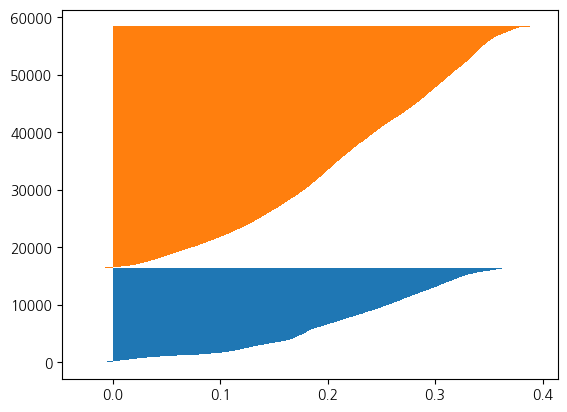

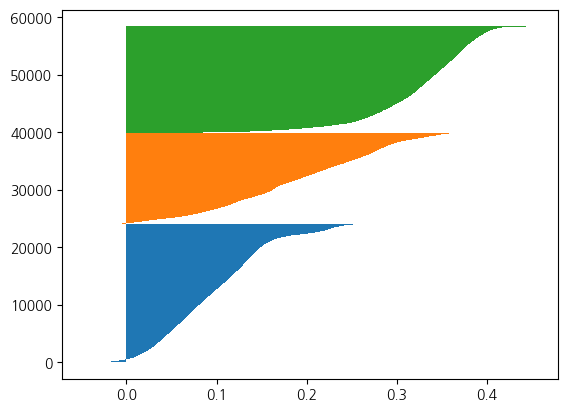

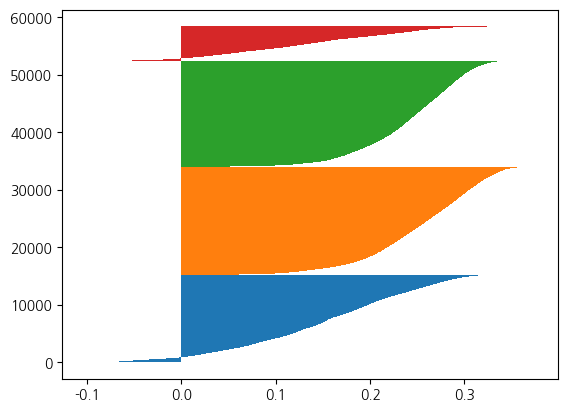

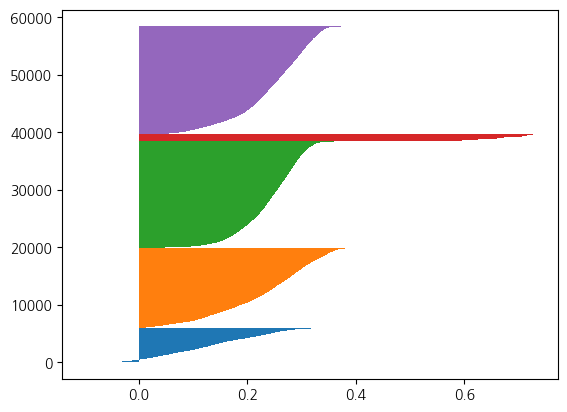

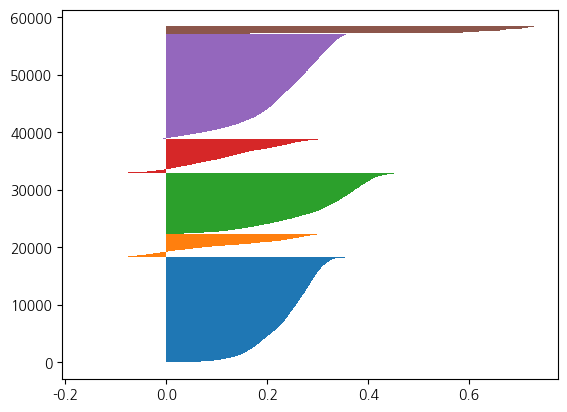

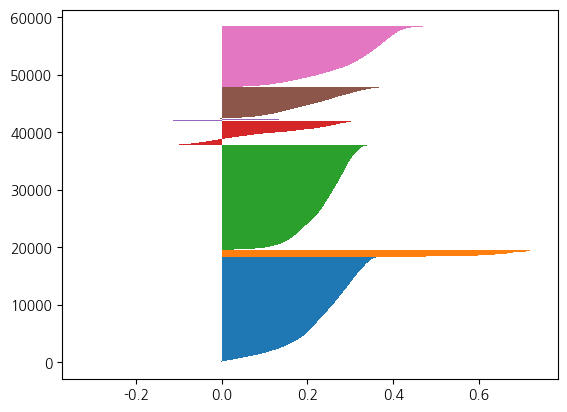

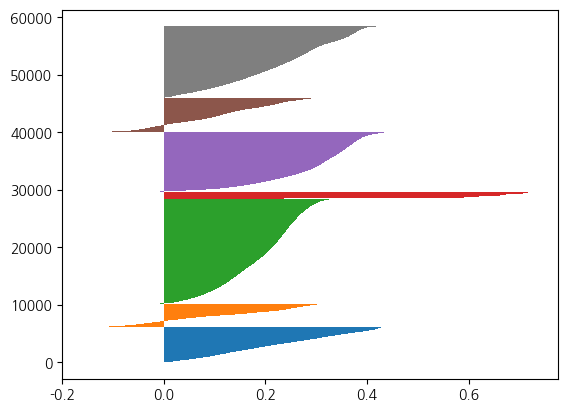

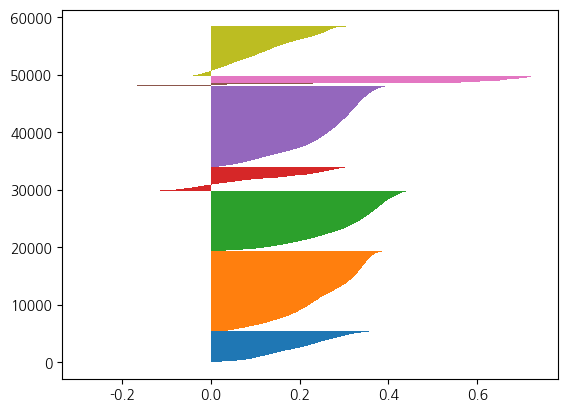

In [74]:
for k in range(2, 10):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(final_bpr_drop_cate_kmeans)
    silhouette_vals = silhouette_samples(final_bpr_drop_cate_kmeans, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

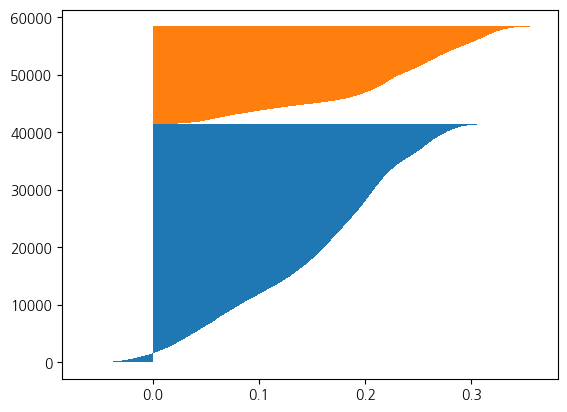

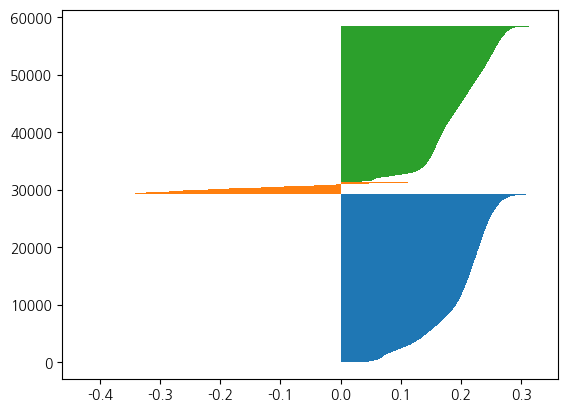

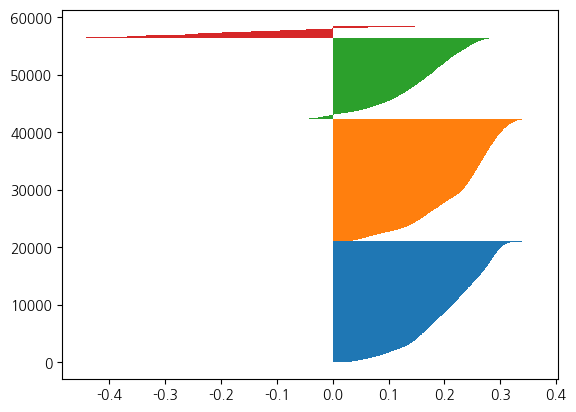

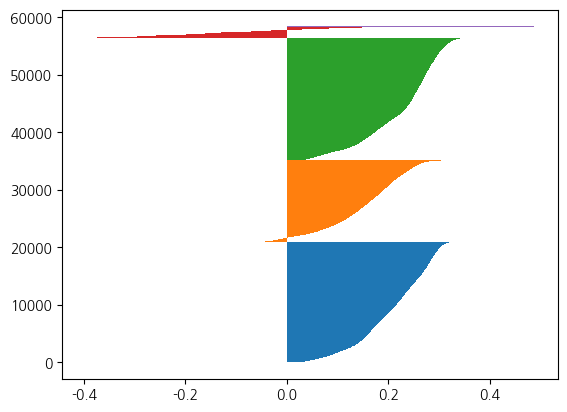

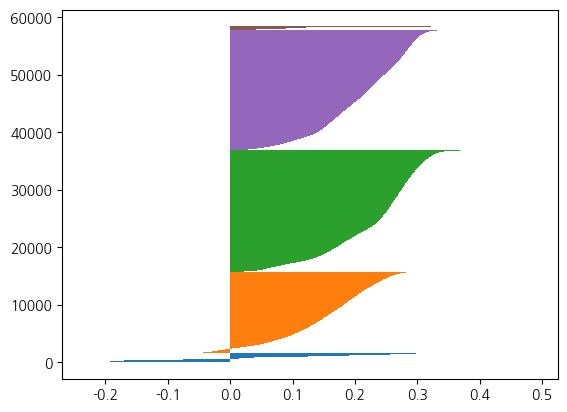

In [99]:
for k in range(2, 7):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(final_bpr_drop_cate_kmeans)
    silhouette_vals = silhouette_samples(final_bpr_drop_cate_kmeans, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

### DBSCAN

In [101]:
from sklearn.cluster import DBSCAN

In [102]:
dbscan = DBSCAN(eps=0.5, min_samples=2)

In [121]:
final_bpr_drop_cate_dbscan = final_bpr_drop_cate_kmeans.copy()
X = final_bpr_drop_cate_dbscan

In [122]:
dbscan.fit(X)
final_bpr_drop_cate_dbscan['군집'] = dbscan.fit_predict(X)

In [123]:
final_bpr_drop_cate_dbscan

,CT_PY_PD,mean_AMT,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,bpr_1,bpr_2,bpr_3,bpr_4,bpr_5,bpr_6,bpr_7,bpr_8,군집
0,-1.432027,5.485298,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-1.345184,1.932909,-0.597126,1.267471,2.302853,0.900136,0.385400,1.587823,0
1,-1.012055,-0.031289,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,0.970575,1.214711,-0.728751,1.551795,0.620955,-0.256759,-0.638049,0.899378,1
2,-1.180044,-0.019868,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.640403,1.489594,-0.172969,0.785049,1.294011,-0.156795,-0.294721,1.656283,1
3,-1.432027,-0.099818,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.413186,-0.886934,-0.091561,0.208395,2.933466,2.303668,1.352801,0.222546,2
4,0.247863,-0.168347,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,0.693566,-0.013231,0.717910,0.510802,-1.314468,0.829763,0.931638,-0.026048,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,-1.432027,-0.214034,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,0.361031,-0.764903,-0.286821,-0.181542,3.153064,2.455953,1.444037,-0.413966,2
58423,-1.432027,-0.224313,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.655780,-0.783390,-0.097723,1.111457,2.991633,2.769977,1.222537,-0.303451,6
58424,-1.432027,-0.218602,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-0.020056,-0.787822,-0.182574,0.218722,2.975394,2.199328,1.648166,-0.275078,2
58425,-1.432027,-0.216318,-0.093828,-0.233488,-0.100888,-0.035438,-0.031858,-0.138938,-0.194387,-0.004137,-0.100915,-0.023892,-1.356467,-0.363593,-1.591140,1.083913,3.141216,0.561973,0.435226,-0.083382,41


In [124]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [125]:
tsne = TSNE(n_components=3, random_state=42)

In [126]:
X_tsne = tsne.fit_transform(X)

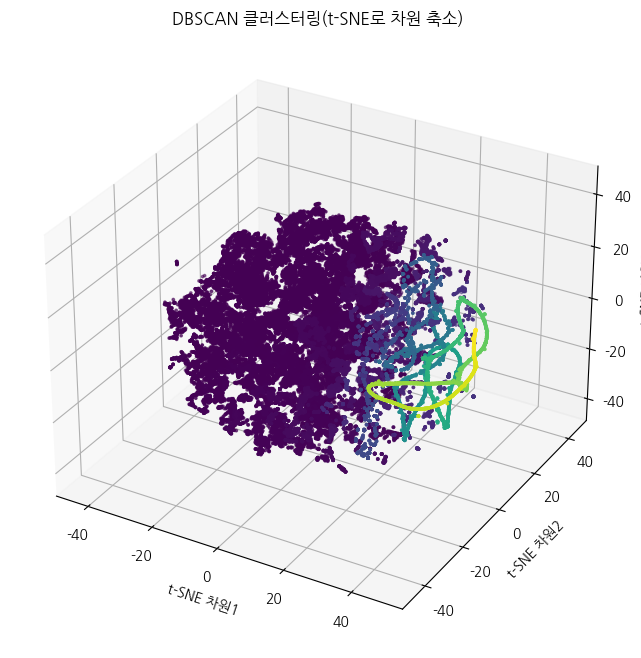

In [129]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=final_bpr_drop_cate_dbscan['군집'], cmap='viridis', marker='o', s=3)
ax.set_title('DBSCAN 클러스터링(t-SNE로 차원 축소)')
ax.set_xlabel('t-SNE 차원1')
ax.set_ylabel('t-SNE 차원2')
ax.set_zlabel('t-SNE 차원3')
plt.show()